# National Tsing Hua University Robust and Stochastic Portfolio Optimization (Fall 2021)

 - Week 4 Programming HW

In [7]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets

# Problem data.

x ,y = datasets.make_blobs(n_samples=300, n_features=2,centers=2,cluster_std=[2.0,2.0],random_state=123)
y = y*2 - 1
y = np.reshape(y,(len(y),1))

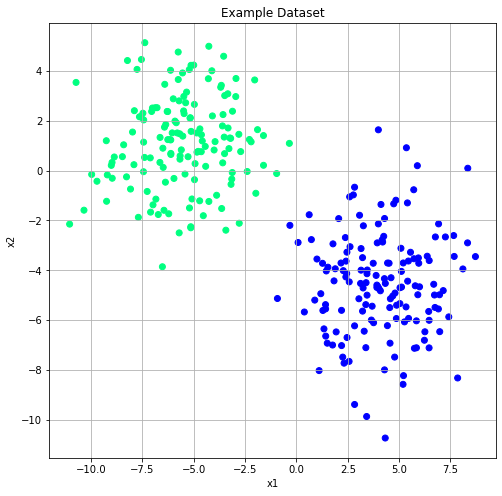

In [8]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='winter')
ax.set_title("Example Dataset")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid()

In [9]:
# Construct the parameters . 
C = 1
w = cp.Variable((x.shape[1],1))   # weights 
b = cp.Variable()                 # alpha
xi = cp.Variable((x.shape[0],1))  # 

In [10]:
objective_function   = cp.Minimize( 0.5*cp.norm(w)**2 + C*cp.sum(xi) )
constraints          = [ cp.multiply(y, x*w + b) >= 1 - xi , xi >= 0 ] # Two Constraints .

/Users/chen-lichiang/opt/anaconda3/lib/python3.8/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


In [11]:
prob = cp.Problem( objective_function  , constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
print(w.value)
print(b.value)

[[-0.78616904]
 [ 0.71708815]]
0.3269153237502596


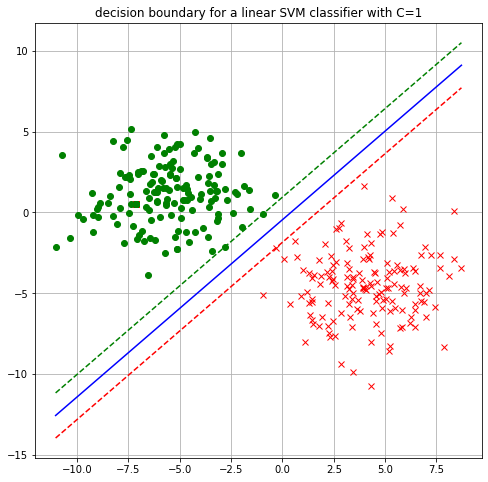

In [12]:
xp = np.linspace(min(x[:,0]), max(x[:,0]), 100)
yp = - (w.value[0]*xp + b.value)/w.value[1]
yp1 = np.array(- (w.value[0]*xp + b.value - C)/w.value[1] )# margin boundary for support vectors for y=1
yp0 = np.array(- (w.value[0]*xp + b.value + C)/w.value[1] )# margin boundary for support vectors for y=0

idx0 = np.where(y==-1)
idx1 = np.where(y==1)

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('decision boundary for a linear SVM classifier with C={}'.format(C) )
ax.plot(x[idx0, 0], x[idx0, 1], 'rx')
ax.plot(x[idx1, 0], x[idx1, 1], 'go')
ax.plot(xp, yp, '-b', xp, yp1, '--g', xp, yp0, '--r')
ax.grid()